# Photographic Math Equation Solver using Neural Networks
## Onat Ayyildiz

GitHub link: https://github.com/OnatAyldz/cmse492_project.git

## Project Description

In this project, the goal is to develop a neural network capable of solving mathematical equations from photographed images. The initial phase will focus on basic arithmetic operations—addition, subtraction, and multiplication. Following this, the project will advance to solving linear equations with a specified number of variables and integrate more complex mathematical functions, such as summations, logarithms, and limits. Convolutional Neural Networks (CNNs) are used for their effectiveness in recognizing and classifying the various components of equations within the images, enabling accurate interpretation and processing of mathematical symbols and structures.


## Project Set-Up

Directories:
- data: Contains subdirectories named according to the classes of symbols ('0', '1', '+', '-', etc.). Each folder holds images of a specific symbol used to train the model.
- automated_test_images: Contains generated test images, each representing an arithmetic equation without the answer. These are used to evaluate model performance.
- test_answers.csv: CSV file listing the ground truth answers for each test equation in automated_test_images. This is used for accuracy evaluation.
- models: Directory where the trained CNN model is saved. Storing the model here allows it to be loaded without retraining each time.
- notebooks: Contains Jupyter notebooks for model experimentation, including functions for loading images, detecting symbols, predicting equations, and displaying results.
- README.md: Provides an overview of the project and instructions for setup and usage.

Within the notebooks directory, there are 3 notebooks. 
- FirstDraft.ipynb: contains exploratory data analysis methods to understand the dataset being used
- accuracy_test.ipynb: contains the testing of data to compute accuracy of the classification of CNN
- EquationGenerator.ipynb: contains the code to generate handwritten equations based on the input dataset

Currently, if no more samples need to be generated, only running the accuracy_test.ipynb notebook should be enough to give all of the information necessary.

# Completed Tasks

- Created a math equation function generator from our dataset.
    - this will be used to generate our testing images from pictures within the dataset.
- Created a neural network that can classify different symbols in a mathematical equation given a picture.
    - if the model can classify different symbols in the mathematical equation, we can combine them together computationally to find the answer.
- Created a model that can solve basic arithmetic using addition, multiplication and subtraction.
    - this is the first step in the photographic math equation solver before we move on to more complicated math problems

# Initial Analysis and Findings

We began by exploring the dataset and defining the problem to be addressed. Our dataset is organized as a folder containing subfolders, each labeled with a different mathematical symbol category: numbers (0–9), arithmetic operators (+, -, *), and potentially trigonometric functions and other symbols. Each subfolder contains numerous images of handwritten examples of its corresponding symbol, providing a diverse training set to improve recognition accuracy.

The core objective of this project is to accurately recognize and classify each symbol in these images and then assemble the symbols in sequence to form a mathematical equation. This requires framing the problem as a classification task, where each symbol in an image is identified as belonging to one of the predefined categories.

Thus, we will train our Convoluted Neural Network (CNN) based on the individual data points to learn to classify the different symbols. We will then classically concatenate the classifications together and evaluate the answers to the equations. Instead of writing numerous math equations by hand, we realized that we could also concatenate different symbols from our dataset to generate "handwritten" math equations, through which we could test our model


# Symbol Classification Process using Convoluted Neural Networks

The images are processed as follows:

**Image Binarization:** Each input image is first converted to binary format using a custom binarize function. This binarization enhances contrast and reduces background noise, improving the model’s ability to focus on the core features of each symbol.

**Contour Detection:** For multi-symbol images (like entire equations), the detect_contours function identifies individual symbol regions. This function uses OpenCV to locate contours within the image, where each contour corresponds to a distinct symbol. By sorting these contours from left to right, we preserve the sequence of symbols for proper equation assembly.

**Symbol Resizing and Padding:** Each detected symbol is then resized to a standard input size (45x45 pixels) using the resize_pad function. This function maintains the aspect ratio of each symbol while resizing and adds padding if necessary, ensuring all symbols are uniformly scaled without distortion when fed into the neural network.

**CNN Model for Classification:** The core of the classification is handled by a Convolutional Neural Network (CNN) model trained on the dataset. The CNN architecture is designed to capture essential features of each symbol through several layers:

**Convolutional Layers:** Extract features from the input images, enabling the model to learn characteristics that distinguish between symbols.

**Max Pooling Layers:** Reduce the spatial dimensions, allowing the model to retain essential features while reducing computation.

**Fully Connected Layers:** After flattening, the network processes the extracted features to classify the symbol into one of the predefined classes.

**Prediction and Equation Assembly:** Once each symbol is classified, the model returns a label that represents the symbol. For test images containing entire equations, the individual symbols are concatenated in the detected order to reconstruct the full equation.

This process yielded us with an model that could classify the different symbols in the equation.

# Preliminary results

## Handwritten Equation Generator

The equation_generator function creates random arithmetic equations by combining randomly selected numbers and operators. This function is crucial for generating synthetic test data, which allows us to test the model’s ability to recognize and solve simple arithmetic expressions.

**Parameters:**
- numbers: Defines the number of operands in the equation (default is 2).
- max_num: Sets the maximum possible value for any randomly generated number (default is 100).
These parameters allow flexibility in the size and complexity of the generated equations.

**Random Number and Operator Generation:**

- Number Generation: The function creates each operand by randomly generating an integer between 0 and max_num.
- Operator Selection: For each number, an operator (+, -, or *) is chosen randomly from a predefined list.
These numbers and operators are stored in a list, generated_eqn, which represents the equation as it is built.
Constructing the Equation:

After the loop completes, the last appended operator (following the last number) is removed to ensure the equation is valid.
The equation components in generated_eqn are then concatenated into a single string.
Calculating and Appending the Answer:

Using eval, the generated equation string is evaluated to compute its answer.
The answer is then appended to the equation as =answer, creating a complete string of the form "23+57=80".
Return Value:

The function returns the full equation with the answer, which can be saved to a file or used to generate synthetic image data. Some of the generated equations are shown below:

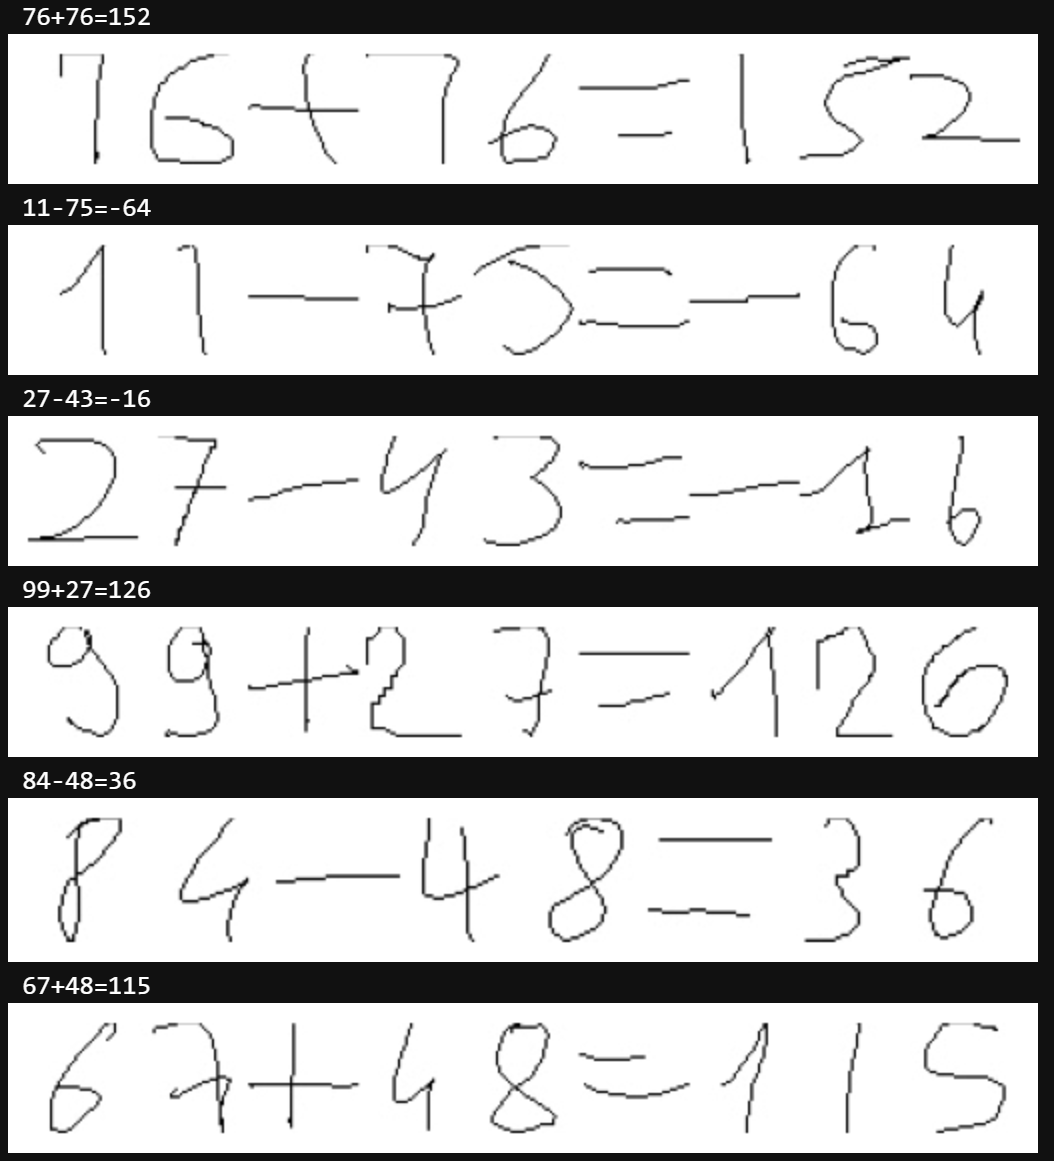

## Section Detection and Contour Drawings

The contour detection process is designed to identify individual symbols within an image of a mathematical equation by outlining each symbol with a bounding box. This method enables the model to isolate and classify each symbol separately.

**Image Binarization and Inversion:**

The function detect_contours first reads the image in grayscale and applies adaptive thresholding to convert it into a binary format.
This binarization improves contrast, making it easier to detect symbol boundaries.
The image is then inverted, switching black and white areas, which is necessary for contour detection in this context.
Contour Detection:

The cv2.findContours function identifies the contours in the binary image. Each contour represents a distinct shape or symbol in the image.
For each contour, a bounding box is created using cv2.boundingRect, which provides the coordinates and dimensions (x, y, width, height) of each detected symbol.

**Bounding Box Merging to Handle Overlapping Symbols:**

The function checks for overlapping bounding boxes, which could occur when symbols are close together.
If two bounding boxes overlap, they are merged into a single box. This step prevents issues with partial or fragmented detection of a single symbol.

**Filtering Small Boxes:**

To remove noise, the function discards very small bounding boxes, ensuring that only significant contours (likely to be symbols) are kept.

**Output:**

The function returns a list of bounding boxes (keep), each representing the coordinates and dimensions of an individual symbol in the equation.

These bounding boxes allow the model to isolate each symbol for separate classification. Some of it appears like so:

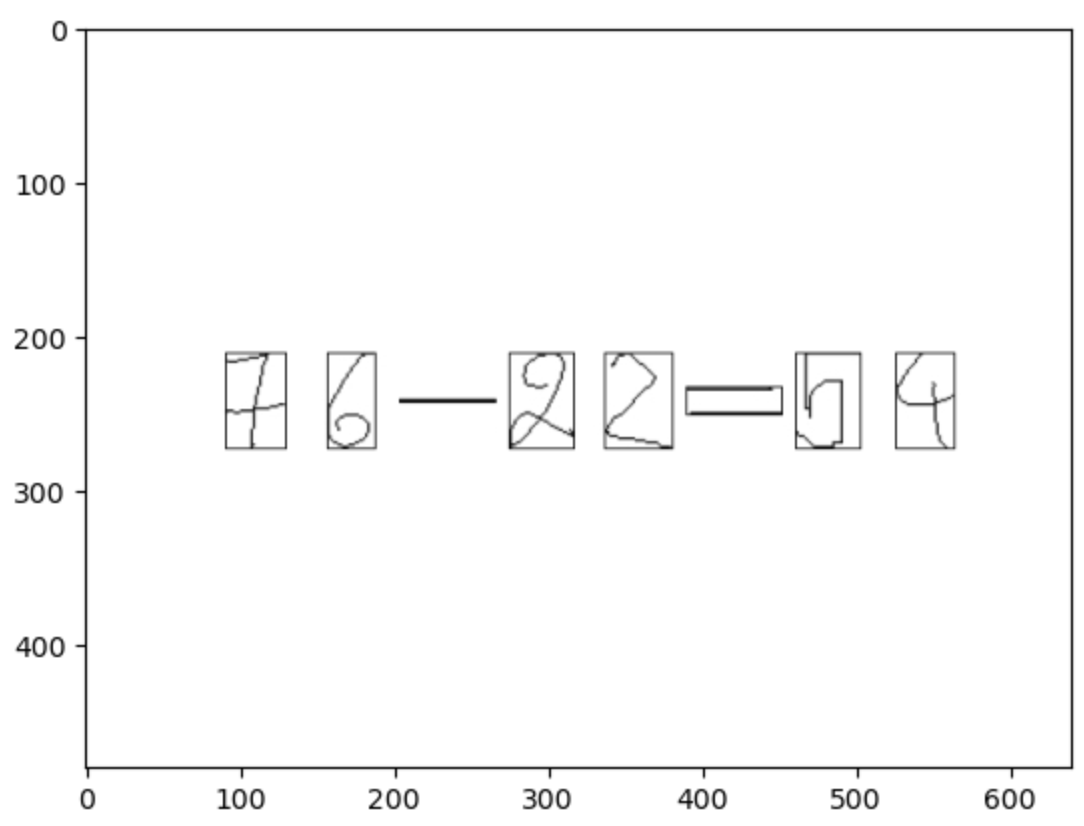

## Making Predictions


The predict_equation function takes an image of a mathematical equation, identifies individual symbols, and assembles the predicted equation string. This function enables the model to interpret equations by breaking down the image into recognizable parts.

**Image Preprocessing:**

Loads and binarizes the image for contrast, isolating each symbol.

**Contour Detection:**

Uses detect_contours to identify and sort bounding boxes around symbols, preserving the left-to-right sequence of the equation.

**Symbol Classification:**

Each symbol is resized and fed to the CNN model, which predicts its class label (e.g., digit, operator).
Predicted labels are combined into a list representing the equation.

**Equation Assembly:**

All symbols are joined into a final string that represents the full equation.

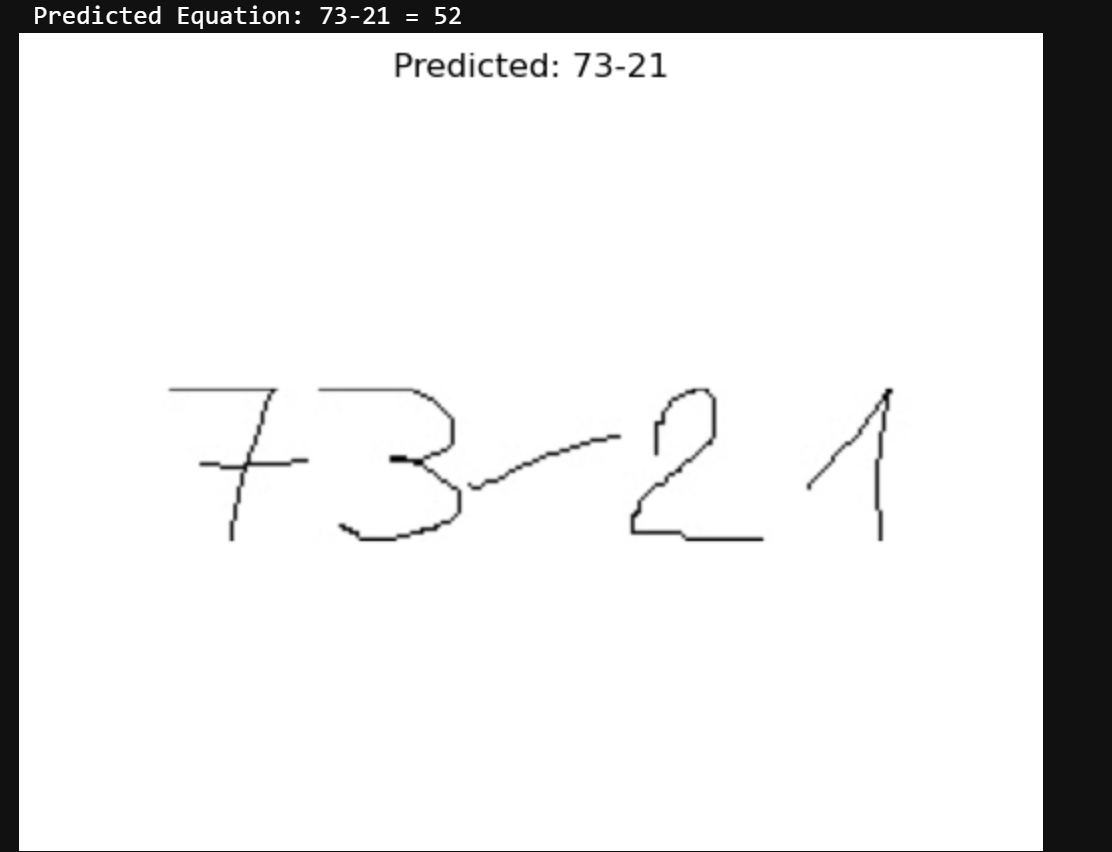

## Challenges and Potential Solutions

Although the algorithm works fine for individual images, once 200 testing "handwritten" math equations were generated and put through the model, we obtain an accuracy of about 47%. When one goes in to see which equations did were not evaluated correctly, we can see that the reason for the inaccuracy is because of the determination of the bounded boxes:

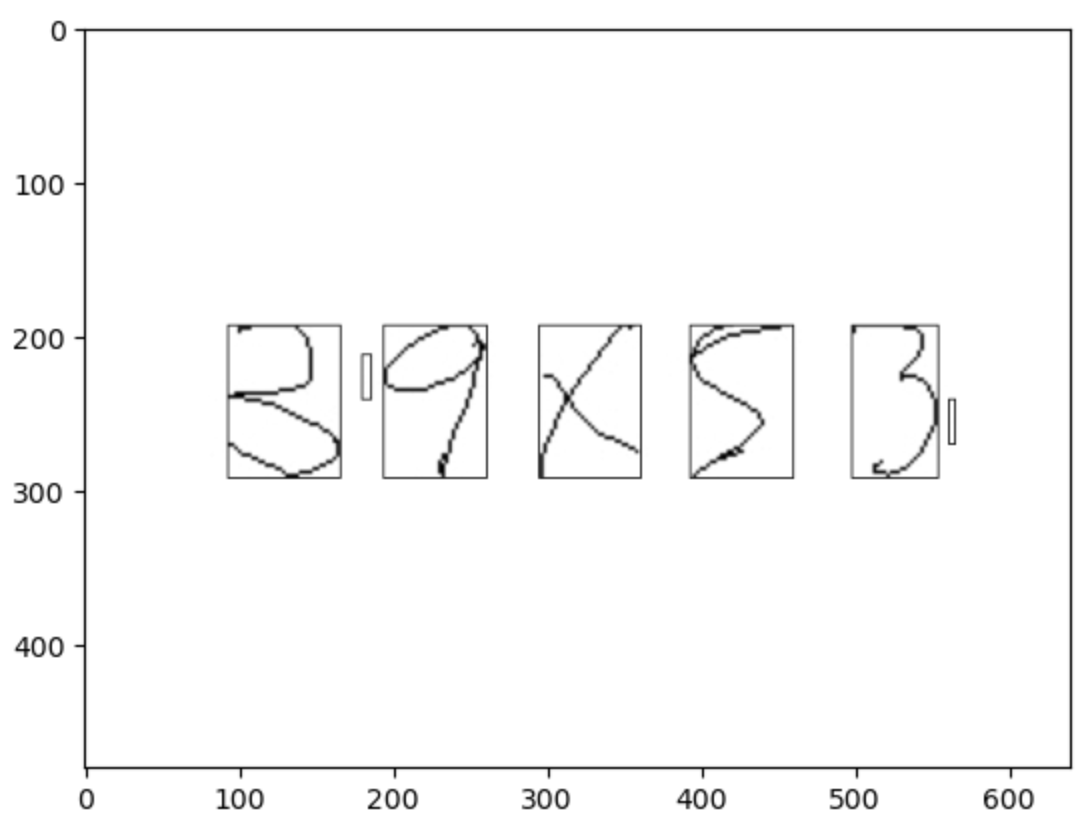

The most likely reason for this is the image preprocessing like binarization and contour detection. Since the equations are computed by the computer directly once the symbols are classified, the only source of error could be this. It could also be possible that our training datasets are biased towards one class over another, however there is a significant amount of data for each class, each of them weighted about equally.

So we can conclude that most likely there is an issue in image preprocessing. Some things of note are:
- thresholding parameters: cv2.adaptiveThreshold might be optimal for all images, creating incomplete contours or not being able to differentiate between close symbols
- small noise in the picture (as shown in the image) can mistakenly be detected as contours. The contour filtering must be fine-tuned to ignore these specks but also process all of the necessary symbols

## Next Steps

### Enhance Image Preprocessing:
- Optimize Binarization: Fine-tune cv2.adaptiveThreshold to improve symbol isolation and reduce background noise.
- Filter Out Artifacts: Add noise filtering to remove small artifacts that could be misidentified as symbols.
  
### Refine Contour Detection:
- Improve Contour Merging: Adjust criteria for merging bounding boxes to better separate close symbols.
- Ensure Consistent Sorting: Verify left-to-right ordering of contours to maintain equation structure.

### Experiment with CNN Architecture: 
- Test deeper models or specialized layers to capture symbol details.
- Tune Hyperparameters: Adjust batch size, learning rate, and epochs to enhance model performance.

### Implement Error Analysis:
- Automate Error Logging: Track misclassifications and contour issues to guide improvements.
- Test on Real-World Images: Evaluate on external handwritten samples for insight into generalization.

### Diversify Operations
- Once arithmetic is optimized, implement different mathematical equations that are available from our dataset

## Conclusion

This project has laid the groundwork for a neural network that recognizes and solves handwritten mathematical equations. We’ve successfully set up a CNN model, organized the dataset, and implemented contour detection to identify symbols in images. While the model performs well in many cases, there are still some challenges with symbol misclassification and contour accuracy, especially when symbols overlap or when there’s image noise.

Through this process, it has become clear the importance of fine-tuning preprocessing of images. Moving forward, we’ll focus on improving contour detection and classification accuracy, as well as testing on a broader range of data. With these final steps, the project is on track to meet its goals and provide a functional model for handwritten equation recognition.

## References
1. https://github.com/tanchongmin/equation-solver/blob/master/train_classifier.ipynb
2. ChatGPT for writing of report